# 2021/12/29
# 本代码寻找吴老师要的S点

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
import numpy as np
import xarray as xr
import sys
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

sys.path.append("/home/sun/mycode/module/")
from module_sun import *

def judge_spoint(u,v,uy,vx):
    if v<0.05 and u<0.05 and vx>=0 and uy<=0:
        return 1
    else:
        return 0

lat_slice  =   slice(-10,30)
lon_slice  =   slice(30,120)
level_slice=   [925,850,700,500,300]

f0  =  xr.open_dataset("/home/sun/qomo-data/composite3.nc").sel(level=level_slice)
disy,disx,location = cal_xydistance(f0.lat,f0.lon)

uy =  np.gradient(f0.uwind.data,location,axis=2)
vx = copy.deepcopy(uy)
for i in range(1,360):
    vx[:,:,i,:] = np.gradient(f0.vwind.data[:,:,i,:],disx[i],axis=2)

judge_s  =  np.zeros(uy.shape)
for i in range(61):
    for j in range(5):
        for k in range(361):
            for m in range(576):
                judge_s[i,j,k,m]  =  judge_spoint(f0.uwind.data[i,j,k,m],f0.vwind.data[i,j,k,m],uy[i,j,k,m],vx[i,j,k,m])

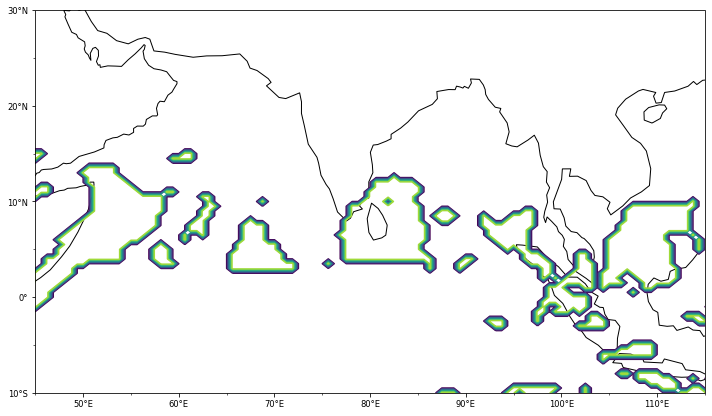

In [4]:
proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(12,14))
lonmin,lonmax,latmin,latmax  =  45,115,-10,30
extent     =  [lonmin,lonmax,latmin,latmax]

ax      =  fig1.add_subplot(projection=proj)
ax.coastlines(resolution='110m',lw=1)
# 设置经纬度刻度.
set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
ax.set_extent(extent, crs=proj)

im  =  ax.contour(f0.lon,f0.lat,judge_s[23,2,:])